In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import L2, L1
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(validation_split = 0.1)

In [4]:
train_imgs = train_gen.flow_from_directory('Car-Bike-Dataset', target_size = (224, 224), classes = ['Bike', 'Car'], batch_size = 32, subset = 'training', shuffle = False)
test_imgs = train_gen.flow_from_directory('Car-Bike-Dataset', target_size = (224, 224), classes = ['Bike', 'Car'], batch_size = 1, subset = 'validation', shuffle = False)

Found 2761 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


### Model

In [5]:
mob = tf.keras.applications.MobileNetV3Large(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

Extension horovod.torch has not been built: /usr/local/lib/python3.8/site-packages/horovod/torch/mpi_lib/_mpi_lib.cpython-38-x86_64-linux-gnu.so not found
If this is not expected, reinstall Horovod with HOROVOD_WITH_PYTORCH=1 to debug the build error.
Warning! MPI libs are missing, but python applications are still avaiable.
[2023-03-01 09:15:05.758 tensorflow-2-6-gpu--ml-g4dn-xlarge-16c714feadc316564cf772a5f8d2:20 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-03-01 09:15:05.786 tensorflow-2-6-gpu--ml-g4dn-xlarge-16c714feadc316564cf772a5f8d2:20 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


In [6]:
mob.trainable = False

In [8]:
model = Sequential()

x = GlobalAveragePooling2D()(mob.output)

out = Dense(2, activation = 'softmax')(x)

model = Model(inputs = mob.input, outputs = out)

In [9]:
cb = tf.keras.callbacks.ModelCheckpoint('mob_large.ckpt', save_weights_only = True, verbose = 1)

In [10]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
history = model.fit(train_imgs, epochs = 7, callbacks = [cb], validation_data = test_imgs)

Epoch 1/7
34/87 [==========>...................] - ETA: 7s - loss: 0.1643 - accuracy: 0.9494

/usr/local/lib/python3.8/site-packages/PIL/Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


87/87 [==============================] - 24s 213ms/step - loss: 0.0907 - accuracy: 0.9725 - val_loss: 0.0307 - val_accuracy: 0.9967

Epoch 00001: saving model to mob_large.ckpt
Epoch 2/7
87/87 [==============================] - 12s 143ms/step - loss: 0.0253 - accuracy: 0.9946 - val_loss: 0.0186 - val_accuracy: 1.0000

Epoch 00002: saving model to mob_large.ckpt
Epoch 3/7
87/87 [==============================] - 13s 145ms/step - loss: 0.0186 - accuracy: 0.9957 - val_loss: 0.0142 - val_accuracy: 1.0000

Epoch 00003: saving model to mob_large.ckpt
Epoch 4/7
87/87 [==============================] - 12s 142ms/step - loss: 0.0153 - accuracy: 0.9960 - val_loss: 0.0118 - val_accuracy: 1.0000

Epoch 00004: saving model to mob_large.ckpt
Epoch 5/7
87/87 [==============================] - 12s 143ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.0103 - val_accuracy: 1.0000

Epoch 00005: saving model to mob_large.ckpt
Epoch 6/7
87/87 [==============================] - 12s 143ms/step - loss: 0

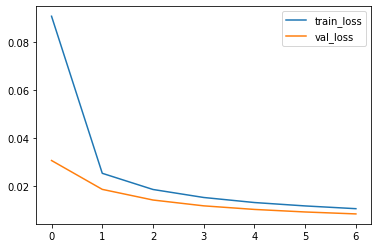

In [12]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()

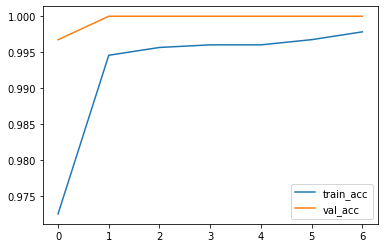

In [14]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['train_acc', 'val_acc'])
plt.show()

In [15]:
model.save('mob_large.h5')

/usr/local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
